In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Proyecto-final.csv')

### 1. Vista por tipo de evento

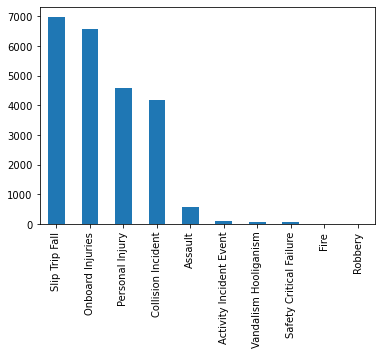

10

In [24]:
df['Incident Event Type'].value_counts(ascending=False).plot(kind='bar')
plt.show()
len(df['Incident Event Type'].value_counts(ascending=False))

### 2. Vista por tipo de Operador

<AxesSubplot:>

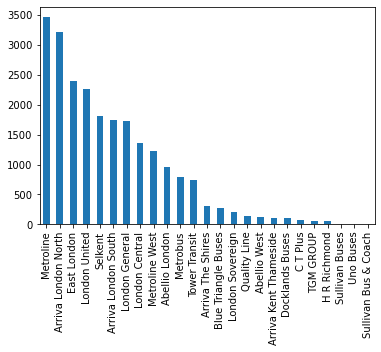

In [4]:
df['Operator'].value_counts(ascending=False).plot(kind='bar')

### 3. Grafico por Categoria de victima 
- Excluyendo a Passenger 18,828 incidentes

<AxesSubplot:>

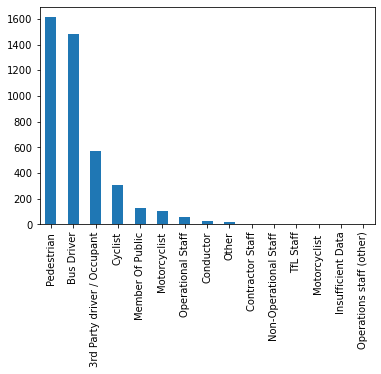

In [5]:
Q1 = df[df.Victim_Category != 'Passenger']
Q1['Victim_Category'].value_counts(ascending=False).plot(kind='bar') 

### 4. Cuadro de Victimas por Categoria divididas por Sexo

In [38]:
Q1 = df
category = list(set(df['Victim_Category']))
sex = list(set(df['Victims_Sex']))
data2 = []
#data9=[ [0,0,0] for i in range(16)]           
for b in range(16):
    data3=[]
    for a in range(3):
        #data9[b][a] = len(df[(Q1['Victims_Sex'] == sex[a]) & (Q1['Victim_Category'] == category[b])])
        data3.append(len(df[(Q1['Victims_Sex'] == sex[a]) & (Q1['Victim_Category'] == category[b])]))
    data2.append(data3)
data1 = pd.DataFrame(data2, index=category,columns=['Male','Female','Unknow'])
data1.sort_values(by=['Male'], ascending=False)


,Male,Female,Unknow
Passenger,3176,4898,10754
Pedestrian,215,848,549
3rd Party driver / Occupant,98,285,190
Cyclist,50,199,59
Member Of Public,17,50,60
Motorcyclist,14,85,3
Operational Staff,11,41,7
Other,7,4,5
Bus Driver,5,1265,214
Conductor,4,19,5


### 4. Cuadro de Incidentes por Tipo divididas por Año

In [47]:
Q1 = df
event = list(set(df['Incident Event Type']))
year = list(set(df['Year']))
year.sort()

data2 = []
for b in range(10):
    data3=[]
    for a in range(4):
        data3.append(len(df[(Q1['Year'] == year[a]) & (Q1['Incident Event Type'] == event[b])]))
    data2.append(data3)
data1 = pd.DataFrame(data2, index=event, columns=['2015','2016','2017','2018'])
data1



,2015,2016,2017,2018
Robbery,0,1,1,1
Collision Incident,1150,1231,1143,642
Slip Trip Fall,0,1574,3074,2333
Vandalism Hooliganism,23,23,15,12
Safety Critical Failure,26,25,9,6
Assault,121,164,204,101
Personal Injury,0,876,2071,1649
Activity Incident Event,0,28,53,33
Fire,0,3,3,0
Onboard Injuries,4395,2168,0,0


### 5. Pie de victimas por año

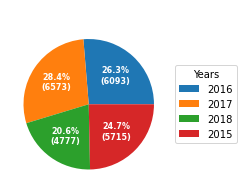

In [37]:
year = list(set(df['Year']))
cantidad = []
for a in range(4):
    cantidad.append(len(df[(Q1['Year'] == year[a])]))

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = cantidad
ingredients = year

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),textprops=dict(color="w"))
ax.legend(wedges, ingredients,title="Years",loc="center left",
bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Accidentados por año", color="w")

plt.show()